In [331]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as figure
import matplotlib.pyplot as plt
import math


In [332]:
import warnings
warnings.filterwarnings("ignore")

In [333]:
df = pd.read_excel('DATASET.xlsx')
df.head()

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


# Preprocessing

In [334]:
df.shape

(1009, 15)

In [335]:
# The above info shows one row is missing, so after checking it is the section 92
# So removing section 92
clear_idx = 910
lst_to_clear = []
for i in range(9):
  lst_to_clear.append(clear_idx+i)
lst_to_clear

df.drop(lst_to_clear, inplace = True)
df

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


In [336]:
# Filling the NULL rows
df.fillna(0, inplace=True)

In [337]:
# Rename column to section_name
df.columns = df.columns.str.replace('Unnamed: 0', 'Section_name')

In [338]:
# Naming sections 
mul = 10
j = 0
for i in range(100):
  sec_name = df.iloc[j,0]
  df.iloc[j:j + mul, 0] = sec_name
  j += mul
test_frame = df.loc[df['year'] == 10]
df

,Section_name,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.520
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.620
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.680
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.780
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,Sec_101,6,454.0,931.8,13.6,125.0,13,116,4150,830,15.1,1.8,1.0,15,1.681
1005,Sec_101,7,454.0,703.0,14.5,17.0,13,118,4150,830,24.6,7.9,2.0,15,1.838
1006,Sec_101,8,454.0,1124.1,14.9,45.0,18,117,4200,840,119.0,15.7,2.0,16,1.862
1007,Sec_101,9,454.0,1462.3,13.2,62.0,27,117,4400,720,138.2,30.5,6.0,18,1.883


# Finding the testing data

In [339]:
test_data = df.loc[df['year'] == 10]
test_data

,Section_name,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


# Applying the model

In [340]:
model = tree.DecisionTreeRegressor(criterion='absolute_error', max_depth=None, max_features='auto', max_leaf_nodes=5, min_impurity_decrease=0, min_samples_leaf=1, min_weight_fraction_leaf=0.0, random_state=29, splitter='best')

In [341]:
predicted = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}
headers = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

In [342]:
rmse = []
n = 0
idx = 0
for col in [10, 11, 12, 13, 14]:
  res = 0
  count = 0
  for row in range(0, 1000, 10):
    xtrain = df.iloc[row:row+9, 1:10]
    ytrain = df.iloc[row:row+9, col]
    xtest = df.iloc[row+9, 1:10].to_numpy()
    ytest = df.iloc[row+9, col]
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest.reshape(1,-1))[0]
    predicted[headers[idx]].append(ypred)
    res += (ytest - ypred)**2
    count += 1
    n += 1
    print(ypred)
  rmse.append(res)
  idx += 1

3.4
60.9
73.5
24.8
0.0
0.5
0.0
0.0
0.0
11.6
29.5
103.9
0.0
85.0
286.7
234.0
23.1
0.0
115.2
304.8
0.4
426.2
440.3
69.7
338.4
8.4
0.0
0.0
318.5
0.0
26.2
148.9
24.1
198.7
31.5
127.85
14.2
4.3
9.9
2.1
5.3
189.95
105.4
6.5
77.9
1.3
0.0
288.6
487.7
0.0
0.0
30.4
19.9
40.6
4.5
96.35
224.3
0.5
11.649999999999999
6.4
14.7
58.9
29.5
83.4
13.0
238.0
0.0
22.3
89.4
1.4
145.05
124.9
0.0
2.0
0.0
0.5
4.1
2.9
0.0
1.0
1.8
0.2
4.8
24.2
22.5
0.0
6.7
4.4
2.3
17.9
27.5
5.2
0.0
0.0
0.0
182.60000000000002
5.2
119.85
140.8
138.2
60.5
30.2
0.0
55.5
261.8
160.5
193.5
266.4
239.5
50.3
288.6
166.9
210.5
28.200000000000003
257.8
152.35000000000002
158.1
121.1
605.3
120.5
76.2
2.0
112.5
30.6
300.6
76.8
72.6
73.9
230.9
0.0
73.5
45.5
206.4
113.2
312.5
235.3
8.3
205.35
190.8
280.3
151.0
46.0
99.8
170.3
170.4
98.9
30.5
289.9
276.4
82.5
153.7
189.8
314.7
110.4
59.0
37.8
200.9
247.6
391.6
135.4
18.3
143.2
112.5
142.3
73.5
39.3
0.0
7.2
7.8
277.4
162.4
553.55
25.4
211.0
193.4
0.5
15.3
43.8
0.0
1.0
33.1
42.7
70.3
166.7
164.5


In [343]:
df_pred = pd.DataFrame.from_dict(predicted)
df_pred
print(rmse)

[211035.03499999995, 122288.55340000005, 22494.659999999996, 19054.5, 1.2571504899999995]


In [344]:
for i in rmse:
    val = (i/count)**0.5
    print(val)

45.93854971589764
34.96978029670762
14.998219894374131
13.80380382358428
0.11212272249637892


In [358]:
RMSE = ((sum(rmse)/500)**0.5)
print("RMSE is ", RMSE)

RMSE is  27.38152682194658


# Graphs

In [346]:
import random
generator = []
for i in range(25):
    generator.append(random.randint(0,100))

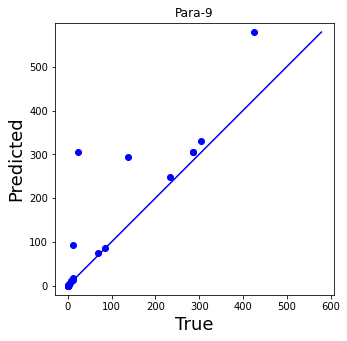

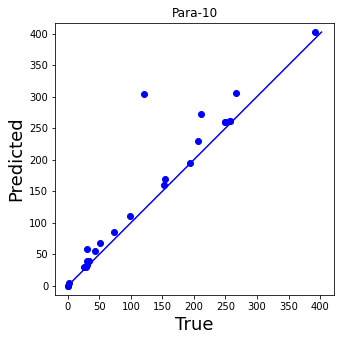

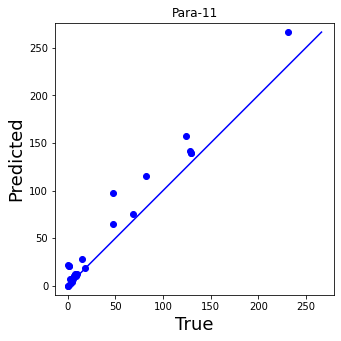

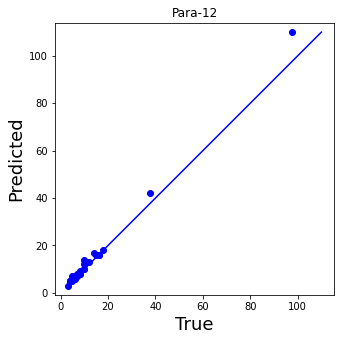

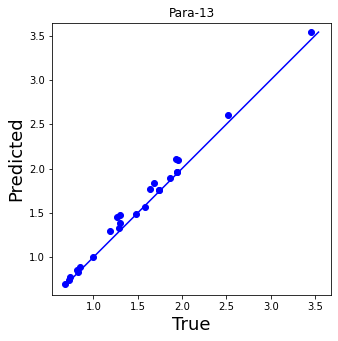

In [347]:
for i in range(5):
  plt.figure(figsize=(5, 5))
  true_value = df_pred.iloc[generator, i]
  predicted_value = test_data.iloc[generator, i + 10]
  plt.scatter(true_value, predicted_value, c='blue')

  p1 = max(max(predicted_value), max(true_value))
  p2 = min(min(predicted_value), min(true_value))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.title(headers[i])
  plt.xlabel('True', fontsize=18)
  plt.ylabel('Predicted', fontsize=18)
  plt.axis('equal')
  plt.show()

In [348]:
# Get random rows for plotting
plot_row = 50

random_rows = []
for i in range(plot_row):
  random_rows.append(random.randint(0,90))

## Plot for Para-9

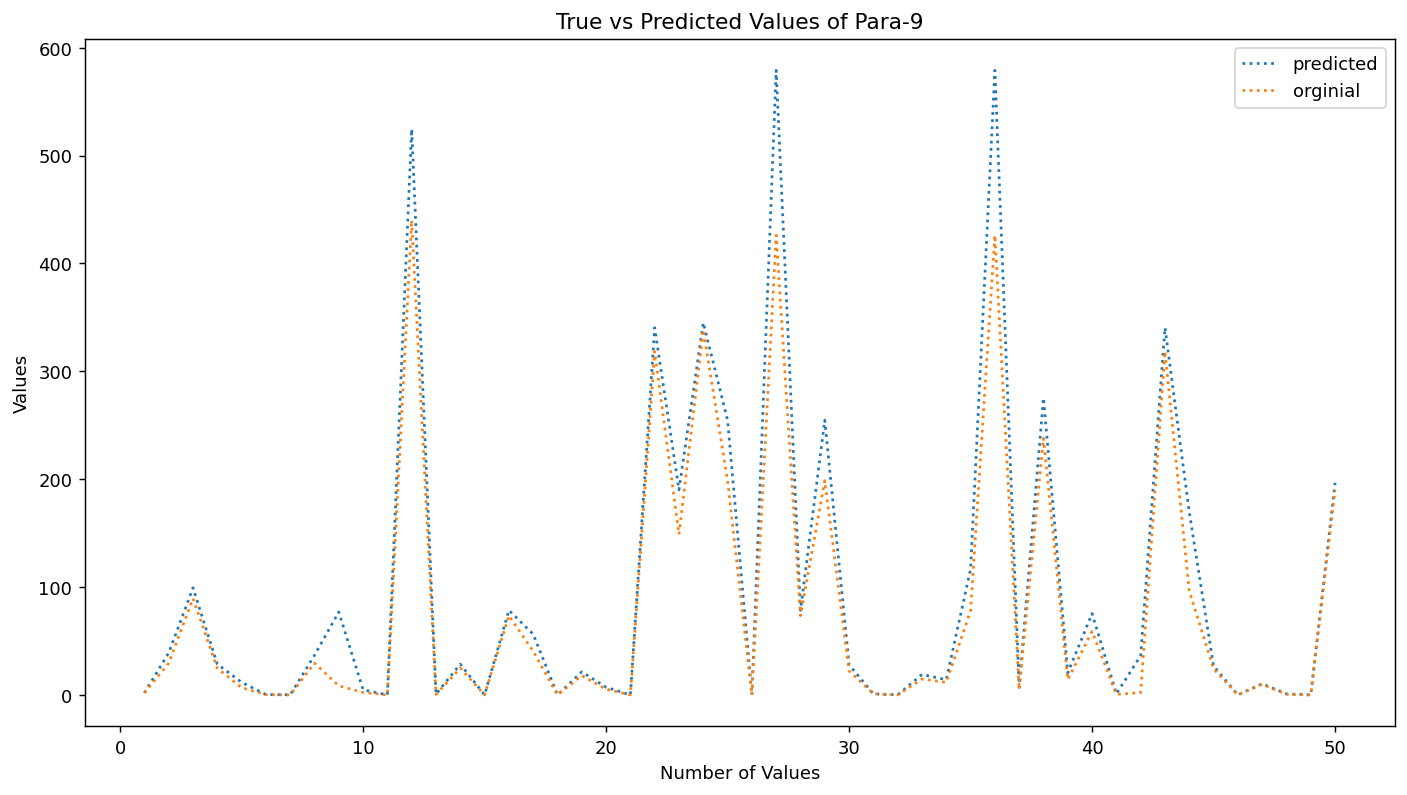

In [352]:
from matplotlib.pyplot import figure

figure(figsize=(13, 7), dpi=130)
true_value = df_pred.iloc[random_rows, 0]
predicted_value = test_data.iloc[random_rows,10]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-9')
plt.legend(loc = 'upper right')

## Plot for Para-10

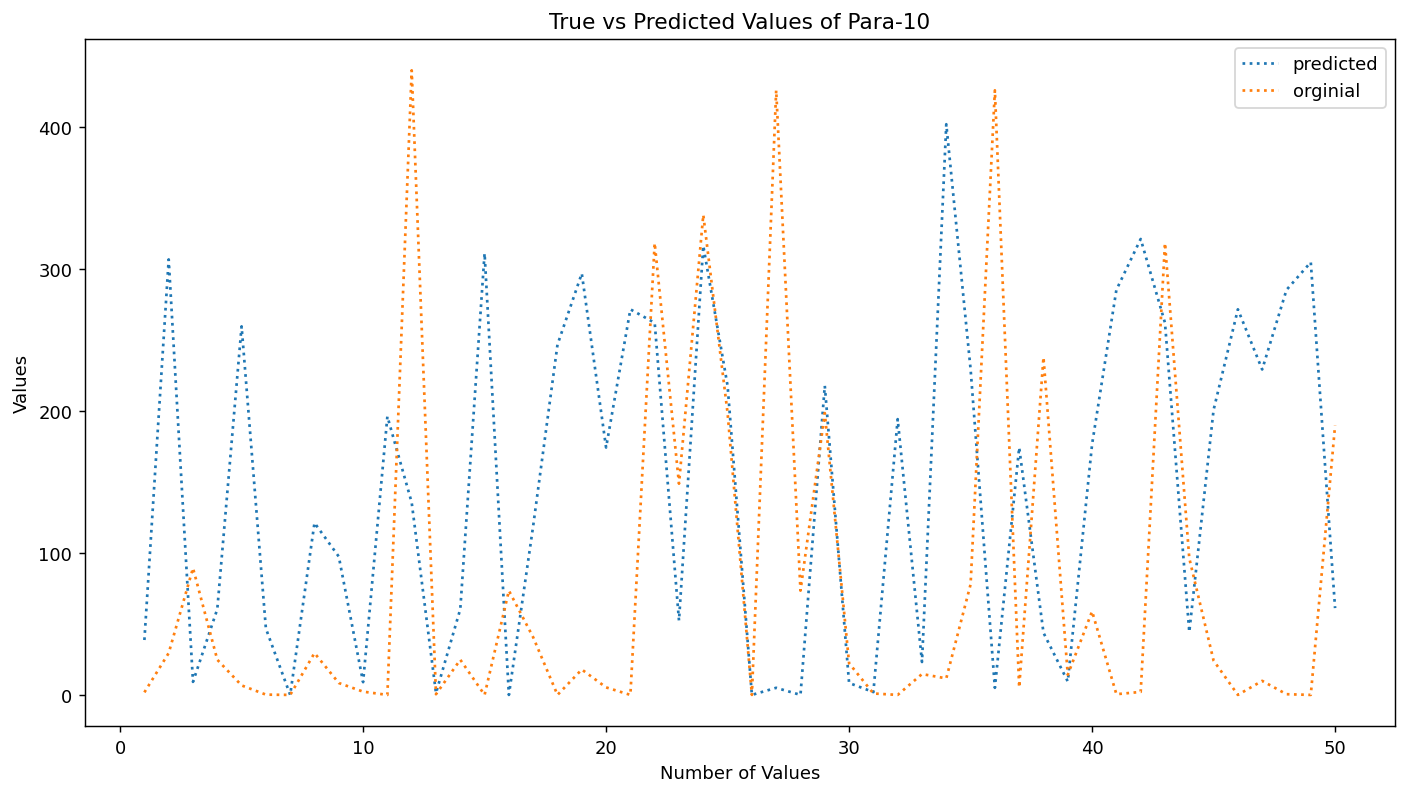

In [353]:
figure(figsize=(13, 7), dpi=130)
true_value = df_pred.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,11]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-10')
plt.legend(loc = 'upper right')

## Plot for Para-11

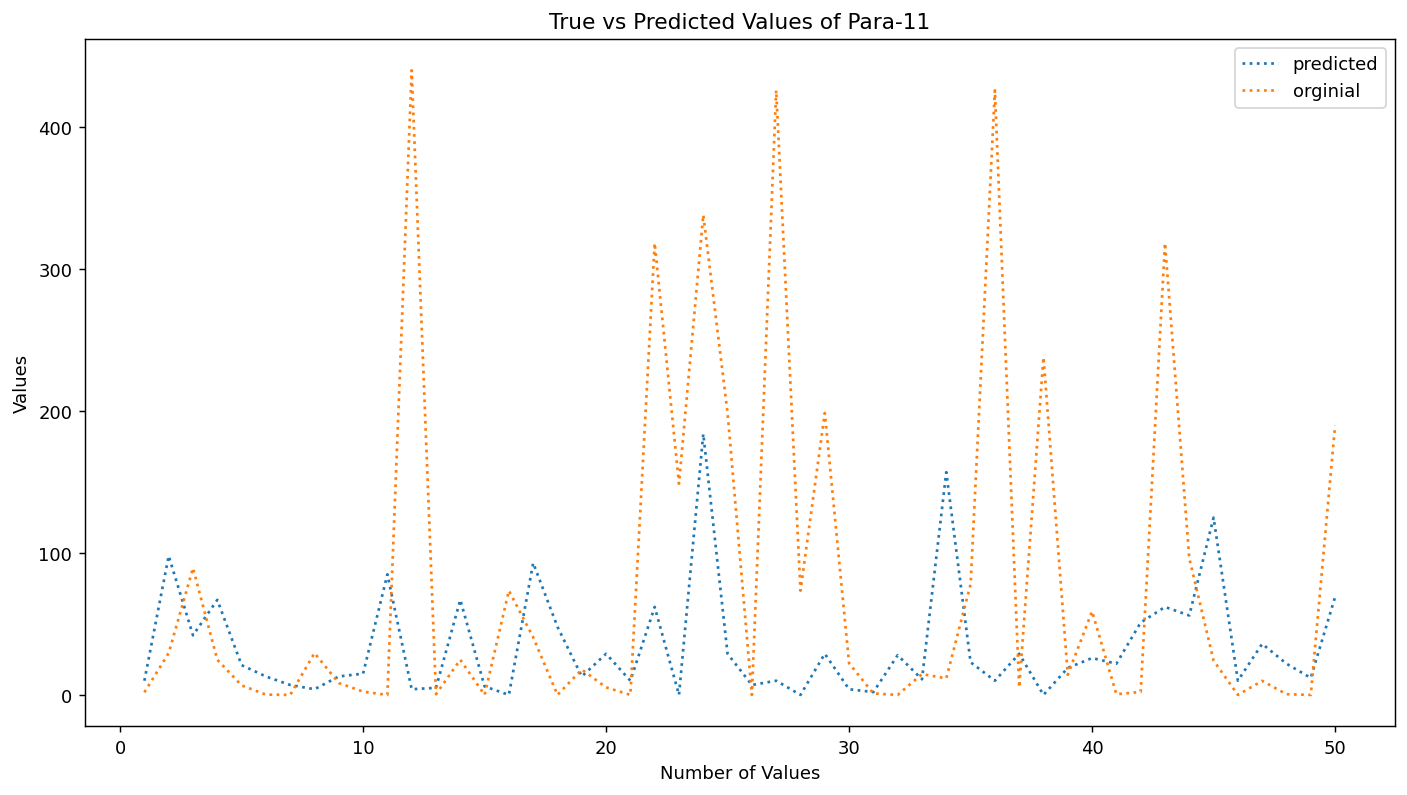

In [354]:
figure(figsize=(13, 7), dpi=130)
true_value = df_pred.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,12]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-11')
plt.legend(loc = 'upper right')

## Plot for Para-12

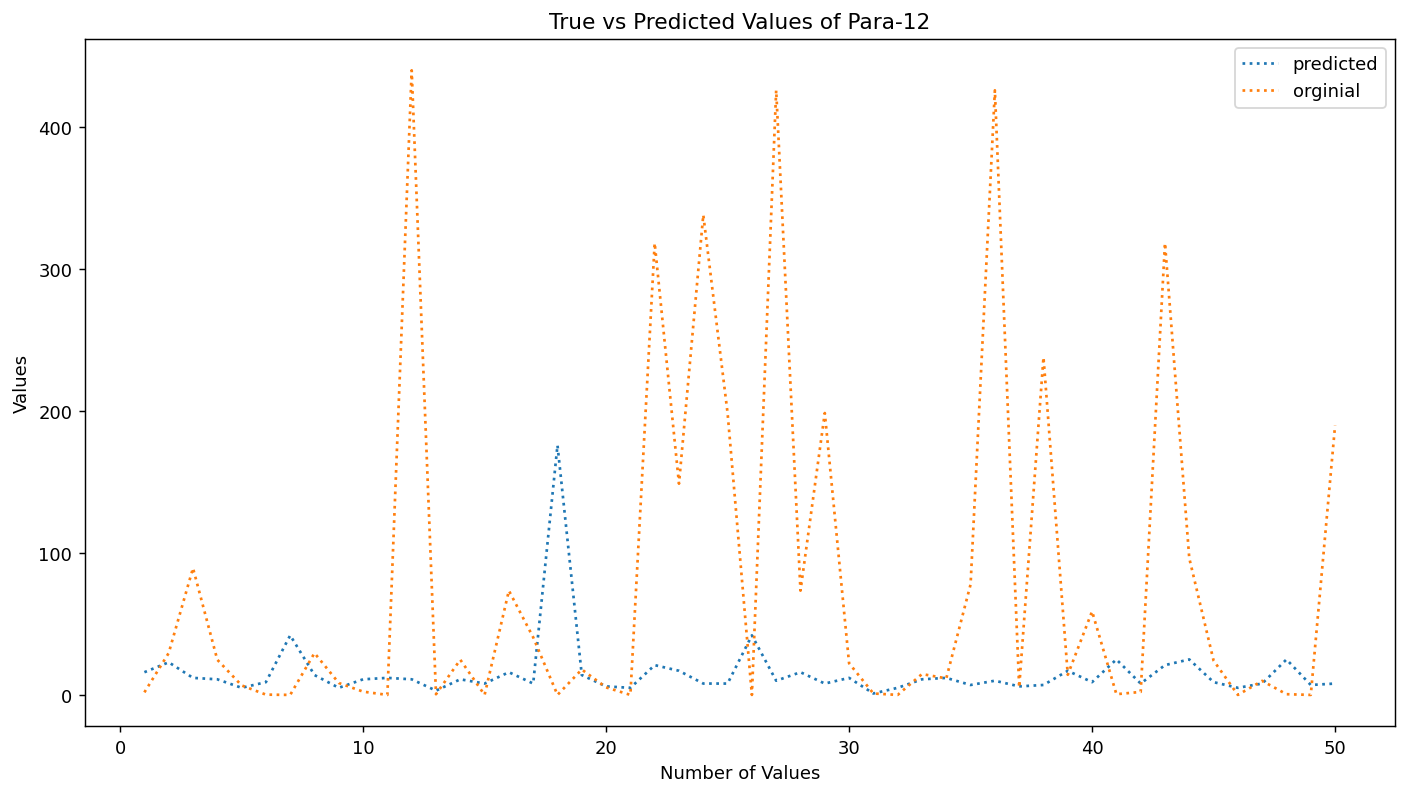

In [355]:
figure(figsize=(13, 7), dpi=130)
true_value = df_pred.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,13]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-12')
plt.legend(loc = 'upper right')

## Plot for Para-13

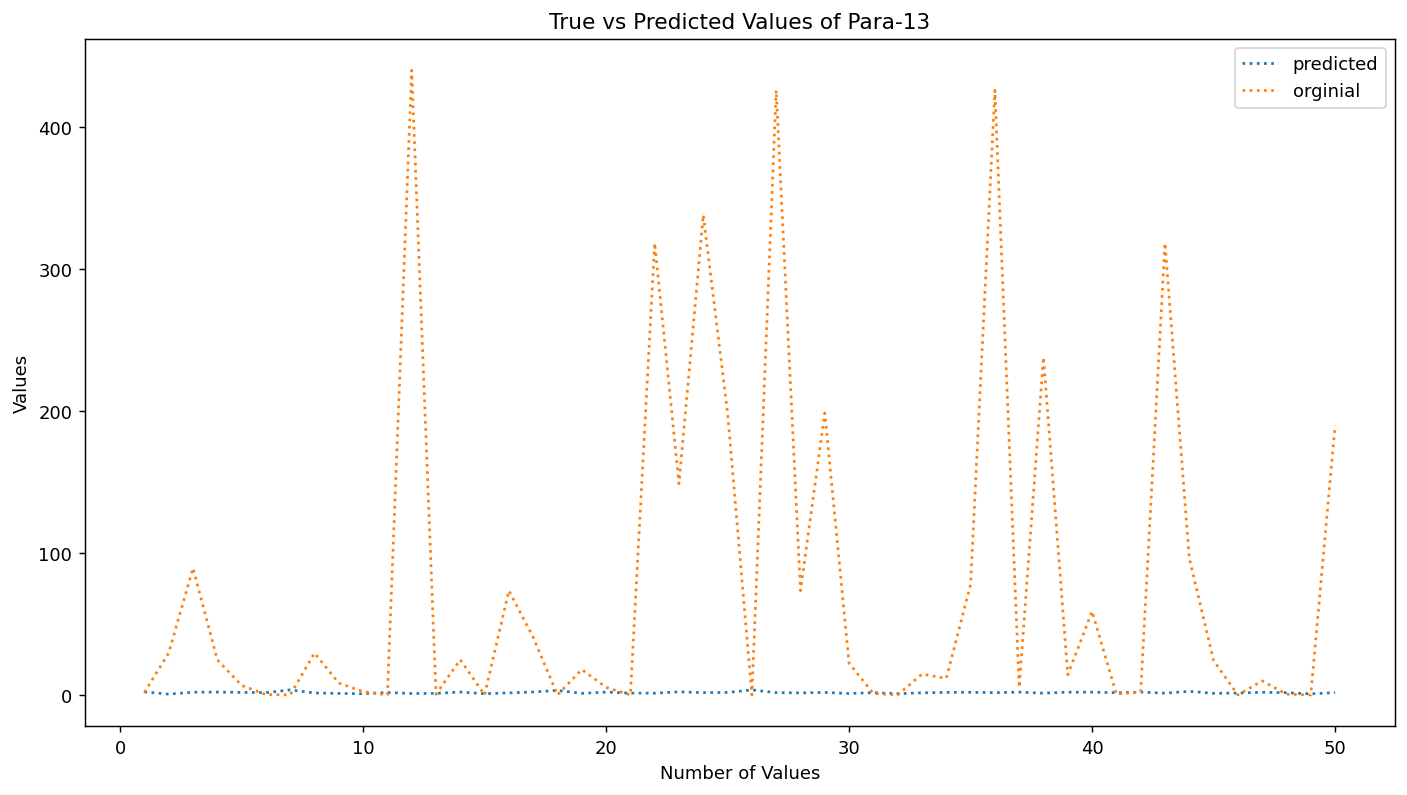

In [356]:
figure(figsize=(13, 7), dpi=130)
true_value = df_pred.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,14]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-13')
plt.legend(loc = 'upper right')